<a href="https://colab.research.google.com/github/divyam-prajapati/ML_Assignment_LR_GD/blob/main/Assignment_No_2_Linear_Regresion_using_gradient_Decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression:
Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).

DATASET:- https://archive.ics.uci.edu/dataset/186/wine+quality

Github:- https://github.com/divyam-prajapati/ML_Assignment_LR_GD.git

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/divyam-prajapati/ML_Assignment_LR_GD/main/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
x = x.drop(["volatile acidity", "residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH"], axis=1)
x

,fixed acidity,citric acid,sulphates,alcohol
0,7.4,0.00,0.56,9.4
1,7.8,0.00,0.68,9.8
2,7.8,0.04,0.65,9.8
3,11.2,0.56,0.58,9.8
4,7.4,0.00,0.56,9.4
...,...,...,...,...
1594,6.2,0.08,0.58,10.5
1595,5.9,0.10,0.76,11.2
1596,6.3,0.13,0.75,11.0
1597,5.9,0.12,0.71,10.2


In [ ]:
x.describe()

,fixed acidity,citric acid,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,0.658149,10.422983
std,1.741096,0.194801,0.169507,1.065668
min,4.600000,0.000000,0.330000,8.400000
25%,7.100000,0.090000,0.550000,9.500000
50%,7.900000,0.260000,0.620000,10.200000
75%,9.200000,0.420000,0.730000,11.100000
max,15.900000,1.000000,2.000000,14.900000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [ ]:
x.describe()

,fixed acidity,citric acid,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,-8.887339e-17,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-1.391472e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-9.293181e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-5.636026e-02,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,7.652471e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,3.743574e+00,7.918677e+00,4.202453e+00


In [ ]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
len(x_train), len(x_test), len(y_train), len(y_test)

(1039, 560, 1039, 560)

# **PART 1**

In [ ]:
X_train = np.array([
    x_train['fixed acidity'].values.tolist(),
    x_train['citric acid'].values.tolist(),
    x_train['sulphates'].values.tolist(),
    x_train['alcohol'].values.tolist()
  ])
X_test = np.array([
    x_test['fixed acidity'].values.tolist(),
    x_test['citric acid'].values.tolist(),
    x_test['sulphates'].values.tolist(),
    x_test['alcohol'].values.tolist()
  ])
Y_train = y_train.to_numpy()
Y_test = y_test.to_numpy()

In [ ]:
X_train = np.insert(X_train, 0, 1, axis=0)
X_test = np.insert(X_test, 0, 1, axis=0)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

class linear_regression():

  def __init__(self, learning_rate, no_iteration, tolorance):
      self.learning_rate = learning_rate
      self.no_iteration = no_iteration
      self.tolorance = tolorance

  def gradient_descent(self, x, y, w):
    # res = w[0] +  w[1] * x[0] + w[2] * x[1] + w[3] * x[2] + w[4] * x[3] - y
    # print("E: ", res.mean(), (res * x[0]).mean(), (res * x[1]).mean(), (res * x[2]).mean(), (res * x[3]).mean())  # .mean() is a method of np.ndarray
    # print("V: ", (x.dot(x.T.dot(w) - y))/len(y))
    # print("X:     ", x)
    # print("RES:   ", x.T.dot(w) - y)
    # print("X*RES: ", x.dot(x.T.dot(w) - y))
    # print("mean:  ", (x.dot(x.T.dot(w) - y))/len(y))
    return (x.dot(x.T.dot(w) - y))/len(y)

  # def gradient_descent(x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
  def fit(self, x, y, w=[0.0, 0.0, 0.0, 0.0, 0.0]):
    vector = np.array(w)
    err_his = {'MSE':[],'MAE':[],'R2':[]}
    for i in range(self.no_iteration):
      diff = -self.learning_rate * np.array(self.gradient_descent(x, y, vector))
      if np.all(np.abs(diff) <= self.tolorance):
        break
      vector += diff
      e = self.error(x, y, vector)
      err_his["MSE"].append(e[0])
      err_his["MAE"].append(e[1])
      err_his["R2"].append(e[2])
      # print("EPOCH", i ," MSE: ", e[0],"     MAE: ", e[1],"     R2: ", e[2])
    # print(i)
    return vector, err_his

  def predict(self, w, x):
    return w.T.dot(x)
    # return w[0] + w[1] * x[0] + w[2] * x[1] + w[3] * x[2] + w[4] * x[3]

  def error(self, x, y, w):
    yp = self.predict(w, x)
    return mean_squared_error(y, yp), mean_absolute_error(y, yp), r2_score(y, yp)

In [ ]:
model = linear_regression(
    learning_rate = 0.01,
    no_iteration = 100000,
    tolorance = 1e-4 # 0.00001
  )
weights, his = model.fit (
    X_train,
    Y_train,
  )
print("Weights: ", weights)
# print("His: ", his)
print("Training Error: ", model.error(X_train, Y_train, weights))
print("Testing  Error: ", model.error(X_test, Y_test, weights))

635
Weights:  [5.63306421 0.06562995 0.06894698 0.13497356 0.36138235]
Training Error:  (0.46523172139578983, 0.5329381091531227, 0.27295816464108147)
Testing  Error:  (0.46597706780438314, 0.5239679561566273, 0.30801274552643765)


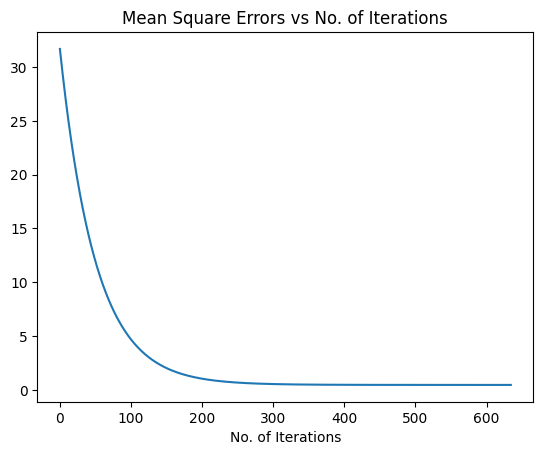

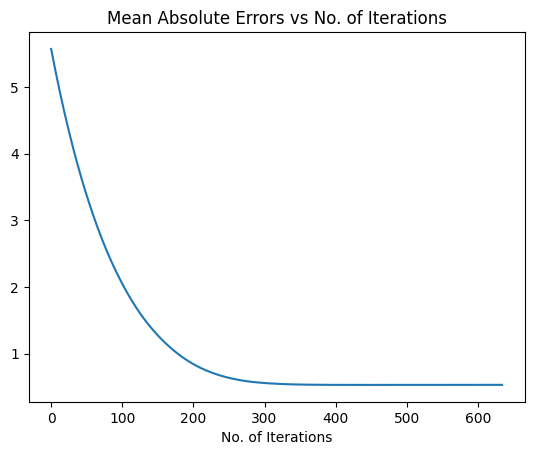

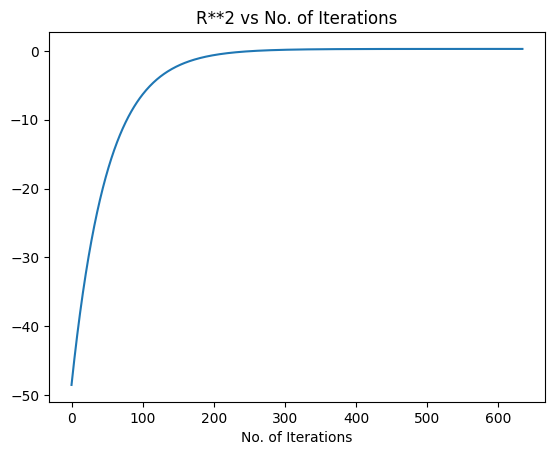

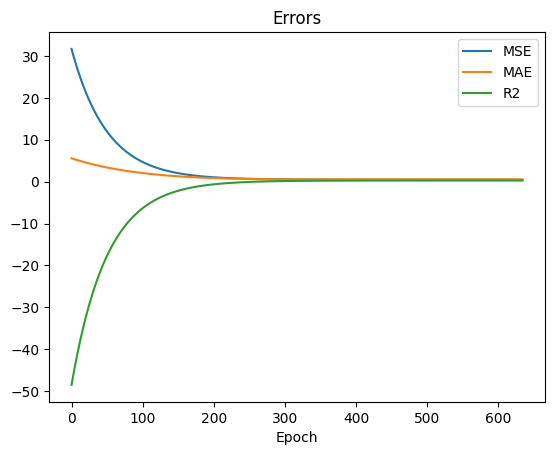

In [ ]:
# Epoch vs MSE/MAE/R2
import matplotlib.pyplot as plt

# print(his.keys())
plt.plot(his['MSE'])
plt.title('Mean Square Errors vs No. of Iterations')
plt.xlabel('No. of Iterations')
plt.show()

plt.plot(his['MAE'])
plt.title('Mean Absolute Errors vs No. of Iterations')
plt.xlabel('No. of Iterations')
plt.show()

plt.plot(his['R2'])
plt.title('R**2 vs No. of Iterations')
plt.xlabel('No. of Iterations')
plt.show()

plt.plot(his['MSE'])
plt.plot(his['MAE'])
plt.plot(his['R2'])
plt.title('Errors')
# plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['MSE', 'MAE', 'R2'], loc='upper right')
plt.show()

# **PART 2**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgdModel = SGDRegressor(
    alpha=0.01,
    max_iter=100000,
    tol=1e-4,
    # learning_rate='optimal',
  ).fit(x_train, y_train)

print("Coeffienct      :", sgdModel.coef_)
print("Incercept       :", sgdModel.intercept_)
print("\n--------------------------------------------------------------------\n")
y_p = sgdModel.predict(x_train)
print( "Training MSE    :", mean_squared_error(y_p, y_train))
print( "Training MAE    :", mean_absolute_error(y_p, y_train))
print( "Training R**2   :", sgdModel.score(x_train, y_train))
print("\n--------------------------------------------------------------------\n")
y_p_t = sgdModel.predict(x_test)
print( "Testing MSE     :", mean_squared_error(y_p_t, y_test))
print( "Testing MAE     :", mean_absolute_error(y_p_t, y_test))
print( "Testing R**2    :", sgdModel.score(x_test, y_test))

Coeffienct      : [0.07715045 0.06981232 0.13243372 0.3625425 ]
Incercept       : [5.6462664]

--------------------------------------------------------------------

Training MSE    : 0.4652823079653184
Training MAE    : 0.5340078799014294
Training R**2   : 0.27287911037486723

--------------------------------------------------------------------

Testing MSE     : 0.46751734772059844
Testing MAE     : 0.5260187465895263
Testing R**2    : 0.30572539246984887


# **EVALUATION**